In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Send an HTTP GET request to the webpage
url = 'https://www.pib.gov.in/PressReleseDetailm.aspx?PRID=1883066'
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all the tables on the page
    tables = soup.find_all('table')

    # Initialize an empty list to store table data
    table_data = []

    # Loop through each table
    for table in tables:
        # Extract data from the table rows and cells
        table_rows = table.find_all('tr')
        table_data.append([[cell.get_text(strip=True) for cell in row.find_all('td')] for row in table_rows])

    # Create a Pandas DataFrame for each table
    dfs = [pd.DataFrame(data) for data in table_data]

    # Save each DataFrame to a separate CSV or XLSX file
#     for i, df in enumerate(dfs):
#         df.to_csv(f'table_{i + 1}.csv', index=False)  # or df.to_excel(f'table_{i + 1}.xlsx', index=False)

#     print("Scraping and saving complete.")

# else:
#     print("Failed to retrieve the webpage.")


In [ ]:
df17_18 = dfs[0].copy()
df19_20 = dfs[1].copy()
df21 = dfs[2].copy()
df_stations = dfs[3].copy()

In [ ]:
df_stations.head()

,0,1,2
0,Sl.No.,STATES/UTs,Number of Cyber Crime Police Stations
1,1,Andhra Pradesh,3
2,2,Arunachal Pradesh,0
3,3,Assam,0
4,4,Bihar,0


In [ ]:
column_name = df_stations.iloc[0]
df_stations.columns = column_name

In [ ]:
df_stations.drop(index=0, inplace=True)
df_stations.set_index('Sl.No.')

,STATES/UTs,Number of Cyber Crime Police Stations
Sl.No.,,
1,Andhra Pradesh,3
2,Arunachal Pradesh,0
3,Assam,0
4,Bihar,0
5,Chhattisgarh,1
6,Goa,1
7,Gujarat,14
8,Haryana,3
9,Himachal Pradesh,1


# **FIXING INDEXING etc of 2021**

In [ ]:
df21.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,SL,State/UT,2021,None,None,None,None,None,None,None,None,None
1,CR,CCS,CON,CDIS,CAQ,PAR,PCS,PCV,PDIS,PAQ,None,None
2,1,Andhra Pradesh,1875,374,8,0,49,363,515,8,0,53
3,2,Arunachal Pradesh,47,3,0,0,0,5,3,0,0,0
4,3,Assam,4846,579,2,2,88,6096,931,2,2,149


In [ ]:
df21_column_names = list(df21.iloc[1, 0:-2])
df21_column_names = ['SL', 'State/UT'] + df21_column_names
df21.columns = df21_column_names

In [ ]:
df21.drop(index=[0,1,30,39], columns='SL', inplace=True)
df21.reset_index(inplace=True, drop=True)

In [ ]:
df21.head()

,State/UT,CR,CCS,CON,CDIS,CAQ,PAR,PCS,PCV,PDIS,PAQ
0,Andhra Pradesh,1875,374,8,0,49,363,515,8,0,53
1,Arunachal Pradesh,47,3,0,0,0,5,3,0,0,0
2,Assam,4846,579,2,2,88,6096,931,2,2,149
3,Bihar,1413,424,2,0,1,980,520,2,0,1
4,Chhattisgarh,352,200,0,0,1,260,245,0,0,4


In [ ]:
df21.tail()

,State/UT,CR,CCS,CON,CDIS,CAQ,PAR,PCS,PCV,PDIS,PAQ
32,Jammu & Kashmir*,154,49,0,0,3,102,60,0,0,5
33,Ladakh,5,0,0,0,0,0,0,0,0,0
34,Lakshadweep,1,1,0,0,0,0,1,0,0,0
35,Puducherry,0,0,0,0,0,0,0,0,0,0
36,TOTAL (ALL INDIA),52974,18744,491,87,577,27374,25512,736,115,778


# **Fixing indexing etc of 2019+2020**

In [ ]:
df19_20 = dfs[1].copy()

In [ ]:
df19_20.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,SL,State/UT,2019,2020,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,CR,CCS,CON,CDIS,CAQ,PAR,PCS,PCV,PDIS,PAQ,...,CON,CDIS,CAQ,PAR,PCS,PCV,PDIS,PAQ,None,None
2,1,Andhra Pradesh,1886,235,3,0,53,452,344,5,...,1899,314,6,10,88,475,446,9,10,123
3,2,Arunachal Pradesh,8,0,0,0,0,1,0,0,...,30,1,0,0,0,12,1,0,0,0
4,3,Assam,2231,349,13,0,53,1636,733,13,...,3530,385,0,0,41,1717,395,0,0,80


In [ ]:
column_names = df21_column_names[1:]

In [ ]:
df19, df20 = df19_20.iloc[:,1:12], df19_20.drop(df19_20.iloc[:,2:12], axis=1)

In [ ]:
df19.head()

,1,2,3,4,5,6,7,8,9,10,11
0,State/UT,2019,2020,None,None,None,None,None,None,None,None
1,CCS,CON,CDIS,CAQ,PAR,PCS,PCV,PDIS,PAQ,CR,CCS
2,Andhra Pradesh,1886,235,3,0,53,452,344,5,0,68
3,Arunachal Pradesh,8,0,0,0,0,1,0,0,0,0
4,Assam,2231,349,13,0,53,1636,733,13,0,53


In [ ]:
df19.drop(index=[0,1,30,39], inplace=True)
df19.reset_index(inplace=True, drop=True)
df19.columns = column_names

<ipython-input-16-cd8b1171178a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df19.drop(index=[0,1,30,39], inplace=True)


In [ ]:
df20.drop(index=[0,1,30,39], columns=0, inplace=True)
df20.reset_index(inplace=True, drop=True)
df20.columns = column_names

In [ ]:
df20.tail(15)

,State/UT,CR,CCS,CON,CDIS,CAQ,PAR,PCS,PCV,PDIS,PAQ
22,Tamil Nadu,782,135,7,7,25,516,237,9,8,28
23,Telangana,5024,939,280,0,56,1169,1158,282,0,81
24,Tripura,34,5,0,0,0,6,5,0,0,0
25,Uttar Pradesh,11097,4987,642,36,47,6491,6427,878,47,55
26,Uttarakhand,243,58,0,1,0,93,80,0,1,0
27,West Bengal,712,178,0,0,6,203,313,0,0,6
28,A&N Islands,5,5,0,0,0,3,5,0,0,0
29,Chandigarh,17,3,1,0,2,4,3,2,0,2
30,D&N Haveli and Daman & Diu+,3,1,0,0,0,1,1,0,0,0
31,Delhi,168,61,0,0,0,107,77,0,0,0


In [ ]:
df19.tail(10)

,State/UT,CR,CCS,CON,CDIS,CAQ,PAR,PCS,PCV,PDIS,PAQ
27,West Bengal,524.0,104.0,4.0,0.0,26.0,215.0,124.0,4.0,0.0,27.0
28,A&N Islands,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
29,Chandigarh,23.0,9.0,5.0,0.0,7.0,14.0,14.0,6.0,0.0,10.0
30,D&N Haveli and Daman & Diu+,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
31,Delhi,115.0,58.0,2.0,1.0,11.0,147.0,80.0,2.0,1.0,12.0
32,Jammu & Kashmir*,73.0,18.0,0.0,0.0,4.0,22.0,22.0,0.0,0.0,6.0
33,Ladakh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,Lakshadweep,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,Puducherry,4.0,3.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,0.0
36,TOTAL (ALL INDIA),44735.0,9187.0,367.0,57.0,627.0,15268.0,14442.0,486.0,84.0,802.0


# **Fixing indexing etc of 2017+2018**

In [ ]:
df17_18 = dfs[0].copy()

In [ ]:
df17, df18 = df17_18.iloc[:,1:12], df17_18.drop(df17_18.iloc[:,2:12], axis=1)

In [ ]:
df17.drop(index=[0,1,30,39], inplace=True)
df17.reset_index(inplace=True, drop=True)
df17.columns = column_names

<ipython-input-22-a53973fb1391>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df17.drop(index=[0,1,30,39], inplace=True)


In [ ]:
df18.drop(index=[0,1,30,39], columns=0, inplace=True)
df18.reset_index(inplace=True, drop=True)
df18.columns = column_names

In [ ]:
df18.head()

,State/UT,CR,CCS,CON,CDIS,CAQ,PAR,PCS,PCV,PDIS,PAQ
0,Andhra Pradesh,1207,243,10,9,33,522,412,14,10,59
1,Arunachal Pradesh,7,0,0,0,0,0,0,0,0,0
2,Assam,2022,201,3,1,38,1730,224,3,2,38
3,Bihar,374,229,0,0,0,357,330,0,0,0
4,Chhattisgarh,139,78,3,0,13,118,109,3,0,16


In [ ]:
df17.head()

,State/UT,CR,CCS,CON,CDIS,CAQ,PAR,PCS,PCV,PDIS,PAQ
0,Andhra Pradesh,931,198,4,0,70,388,269,5,4,102
1,Arunachal Pradesh,1,0,0,0,0,0,0,0,0,0
2,Assam,1120,179,0,0,1,1261,726,0,0,1
3,Bihar,433,251,2,0,19,884,265,3,0,20
4,Chhattisgarh,171,78,9,4,8,128,127,9,4,18


# **Data Filtering & Sorting**

In [ ]:
print(df17.shape, df18.shape, df19.shape, df20.shape, df21.shape, df_stations.shape)

(37, 11) (37, 11) (37, 11) (37, 11) (37, 11) (38, 3)


In [ ]:
df17.loc[:,'CR':] = df17.loc[:,'CR':].apply(pd.to_numeric, errors='coerce')
df18.loc[:,'CR':] = df18.loc[:,'CR':].apply(pd.to_numeric, errors='coerce')
df19.loc[:,'CR':] = df19.loc[:,'CR':].apply(pd.to_numeric, errors='coerce')
df20.loc[:,'CR':] = df20.loc[:,'CR':].apply(pd.to_numeric, errors='coerce')
df21.loc[:,'CR':] = df21.loc[:,'CR':].apply(pd.to_numeric, errors='coerce')

In [ ]:
df_overall = df17.loc[:,'CR':] + df18.loc[:,'CR':] + df19.loc[:,'CR':] + df20.loc[:,'CR':] + df21.loc[:,'CR':]

In [ ]:
df_overall.insert(0, 'State/UT', df21['State/UT'])

In [ ]:
df_overall[df_overall['State/UT']=='Ladakh'] = df21[df21['State/UT']=='Ladakh']
df_overall.tail(10)

,State/UT,CR,CCS,CON,CDIS,CAQ,PAR,PCS,PCV,PDIS,PAQ
27,West Bengal,2652.0,908.0,25.0,1.0,49.0,1089.0,1070.0,25.0,1.0,51.0
28,A&N Islands,25.0,19.0,0.0,1.0,1.0,18.0,24.0,0.0,1.0,1.0
29,Chandigarh,117.0,44.0,10.0,1.0,24.0,70.0,57.0,12.0,1.0,27.0
30,D&N Haveli and Daman & Diu+,12.0,4.0,0.0,0.0,0.0,7.0,6.0,0.0,0.0,0.0
31,Delhi,990.0,346.0,7.0,12.0,12.0,936.0,611.0,7.0,12.0,14.0
32,Jammu & Kashmir*,483.0,106.0,0.0,0.0,18.0,193.0,136.0,0.0,0.0,28.0
33,Ladakh,5,0,0,0,0,0,0,0,0,0
34,Lakshadweep,12.0,1.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0
35,Puducherry,33.0,11.0,0.0,0.0,1.0,16.0,16.0,0.0,0.0,3.0
36,TOTAL (ALL INDIA),196788.0,54521.0,2615.0,271.0,2664.0,86232.0,76737.0,3354.0,360.0,3659.0


In [ ]:
df_overall[df_overall['State/UT']=='Ladakh'] = df21[df21['State/UT']=='Ladakh']

In [ ]:
df17 = df17[df17['State/UT']!='Ladakh']
df18 = df18[df18['State/UT']!='Ladakh']
df19 = df19[df19['State/UT']!='Ladakh']

In [ ]:
df17.to_csv('data_17.csv')
df18.to_csv('data_18.csv')
df19.to_csv('data_19.csv')
df20.to_csv('data_20.csv')
df21.to_csv('data_21.csv')
df_overall.to_csv('data_overall.csv')
df_stations.to_csv('data_stations.csv')

# some Test-Visualizations

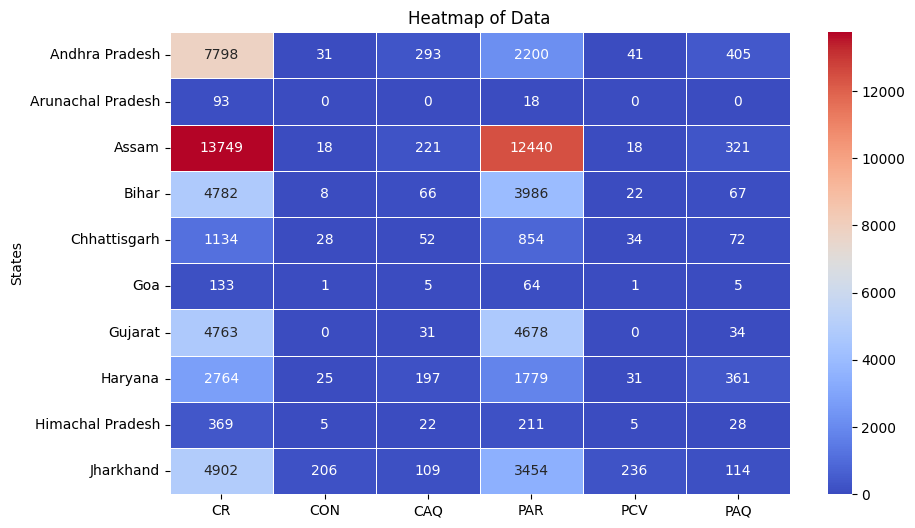

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = {
    'States': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jharkhand'],
    'CR': [7798, 93, 13749, 4782, 1134, 133, 4763, 2764, 369, 4902],
    'CON': [31, 0, 18, 8, 28, 1, 0, 25, 5, 206],
    'CAQ': [293, 0, 221, 66, 52, 5, 31, 197, 22, 109],
    'PAR': [2200, 18, 12440, 3986, 854, 64, 4678, 1779, 211, 3454],
    'PCV': [41, 0, 18, 22, 34, 1, 0, 31, 5, 236],
    'PAQ': [405, 0, 321, 67, 72, 5, 34, 361, 28, 114]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set 'States' as the index
df.set_index('States', inplace=True)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Data')
plt.show()


In [ ]:
import pandas as pd

# Sample DataFrame with multiple columns
data = {
    # 'States': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jharkhand'],
    'CR': [7798, 93, 13749, 4782, 1134, 133, 4763, 2764, 369, 4902],
    'CON': [31, 0, 18, 8, 28, 1, 0, 25, 5, 206],
    'CAQ': [293, 0, 221, 66, 52, 5, 31, 197, 22, 109],
    'PAR': [2200, 18, 12440, 3986, 854, 64, 4678, 1779, 211, 3454],
    'PCV': [41, 0, 18, 22, 34, 1, 0, 31, 5, 236],
    'PAQ': [405, 0, 321, 67, 72, 5, 34, 361, 28, 114]
}

# Create the original DataFrame
df = pd.DataFrame(data)

# Define custom intervals
intervals = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, float('inf')]

# Create a new DataFrame to store categorical data
df_category = pd.DataFrame()

# Iterate through columns in the original DataFrame
for column in df.columns:
    # Create a categorical column based on the custom intervals
    df_category[column + '_Category'] = pd.cut(df[column], bins=intervals, labels=['0-500', '500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000', '3000-3500', '3500-4000', '4000-above'])

# Display the new DataFrame with categorical data
df_category.head()


,CR_Category,CON_Category,CAQ_Category,PAR_Category,PCV_Category,PAQ_Category
0,4000-above,0-500,0-500,2000-2500,0-500,0-500
1,0-500,NaN,NaN,0-500,NaN,NaN
2,4000-above,0-500,0-500,4000-above,0-500,0-500
3,4000-above,0-500,0-500,3500-4000,0-500,0-500
4,1000-1500,0-500,0-500,500-1000,0-500,0-500


In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Sample data (replace this with your actual data)
data = {
    'States': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jharkhand'],
    'CR': [7798, 93, 13749, 4782, 1134, 133, 4763, 2764, 369, 4902],
    'CON': [31, 0, 18, 8, 28, 1, 0, 25, 5, 206],
    'CAQ': [293, 0, 221, 66, 52, 5, 31, 197, 22, 109],
    'PAR': [2200, 18, 12440, 3986, 854, 64, 4678, 1779, 211, 3454],
    'PCV': [41, 0, 18, 22, 34, 1, 0, 31, 5, 236],
    'PAQ': [405, 0, 321, 67, 72, 5, 34, 361, 28, 114]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set 'States' as the index
df.set_index('States', inplace=True)

# Create a custom color scale
custom_colors = [
    [0.0, 'rgb(175,220,230)'],
    [0.25, 'rgb(125,170,225)'],  # Light Blue
    [0.5, 'rgb(50,75,220)'],      # Blue
    [0.75, 'rgb(50,50,180)'],     # Red
    [1.0, 'rgb(255,0,0)']      # Red
]

# Create a heatmap trace with the custom color scale
heatmap_trace = go.Heatmap(
    x=df.columns,
    y=df.index,
    z=df.values,
    colorscale=custom_colors,
    colorbar=dict(xanchor='left', title='Color Scale')
)

# Create a layout
layout = go.Layout(
    title='Heatmap of Data',
    xaxis=dict(title='Categories'),
    yaxis=dict(title='States', automargin=True),
    plot_bgcolor='white',  # Set plot background color to white
    xaxis_showgrid=True,  # Show x-axis grid lines
    yaxis_showgrid=True,  # Show y-axis grid lines
    xaxis_gridcolor='lightgray',  # Set grid line color
    yaxis_gridcolor='lightgray',  # Set grid line color
    margin=dict(l=100, r=10, t=80, b=100),  # Adjust margins for better spacing
)

# Create a figure and add the heatmap trace
fig = go.Figure(data=[heatmap_trace], layout=layout)

# Show the heatmap using Plotly
fig.show()
